In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize

[0.5 0.5]


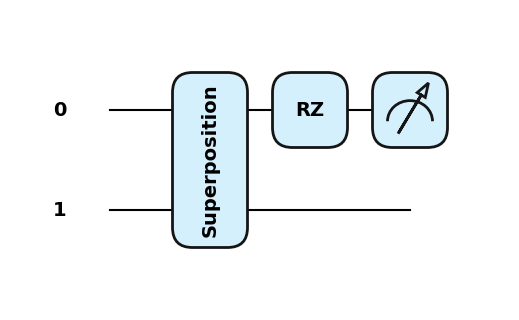

In [220]:
# calculate rotation angle
dev = qml.device('default.qubit', wires=2)

base = [[0], [1]]
coeff = [1,1]

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=0, work_wire=1)
    return qml.probs(0)

p = circuit(base, coeff)

def rotAngle(p):
    return -1j/2*np.log(p[0]/p[1])
    
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=0, work_wire=1)
    
    # rotation
    qml.RZ(rotAngle(p), wires=0)
    return qml.probs(0)

print(circuit(base, coeff, p))

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)([[0], [1]], [1, 3], p)
plt.show()

norm of the state : 1.0
original amplitudes : [0.04347826 0.39130435 0.17391304 0.39130435]
(array([0.52173913, 0.32608696]), array([0.52173913, 0.32608696]), array([0.26086957, 0.26086957, 0.26086957, 0.06521739]))


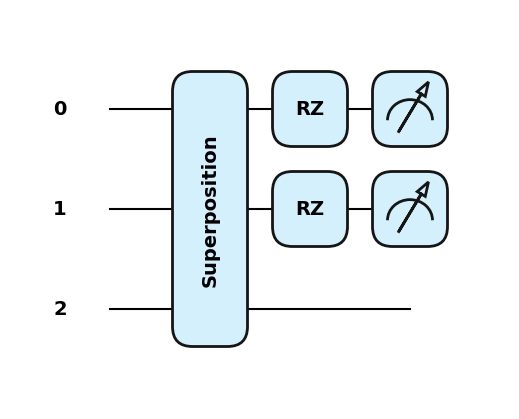

In [218]:
# calculate rotation angle
dev = qml.device('default.qubit', wires=3)

base = [[0,0], [0,1], [1,0], [1,1]]
coeff = [1,3,2,3] # works only when p1/p2 == p3/p4

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')
    
    return qml.probs([0,1])

p = circuit(base, coeff)
print(f'original amplitudes : {p}')

# def rotAngle_2d(p): wrong approach
#     c1 = np.log(p[0])+np.log(p[3])
#     c2 = np.log(p[1])+np.log(p[2])
#     return [(c1+c2)/4j, (c1-c2)/4j]

def rotAngle_2d(p):
    c1 = (np.log(p[0]) - np.log(p[2])) / 2j
    c2 = (np.log(p[0]) - np.log(p[1])) / 2j
    return [c1, c2]
    
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    
    # rotation
    p0, p1 = rotAngle_2d(p)
    qml.RZ(p0, wires=0)
    qml.RZ(p1, wires=1)
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

print(circuit(base, coeff, p))

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(base, coeff, p)
plt.show()

In [182]:
def rotAngle_2d_shift(p):
    c1 = (np.log(p[0]) - np.log(p[2])) / 2j
    c2 = ((np.log(p[0]) - np.log(p[1]))+(np.log(p[2]) - np.log(p[3])))/ 4j
    c3 = ((np.log(p[2]) - np.log(p[3]))+(np.log(p[1]) - np.log(p[0])))/ 4j
    # c1 = np.arccos(np.square(p[0]/p[2]))
    # c2 = np.arccos(np.square(p[0]/p[1]))
    return [c1, c2, c3]

rotAngle_2d_shift(p)

[1.3862943611198906j, -0.3465735902799727j, -1.0397207708399179j]

In [184]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0, 1], work_wire=2)
    
    # rotation
    qml.RZ(p[0], wires=0)
    qml.RZ(p[1], wires=1)

    # phase shift
    qml.PhaseShift(p[2], wires=1)
    
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

circuit(base, coeff, rotAngle_2d_shift(p))

(array([8.3567165 , 0.25712974]),
 array([0.25712974, 8.3567165 ]),
 array([0.12856487, 8.22815164, 0.12856487, 0.12856487]))

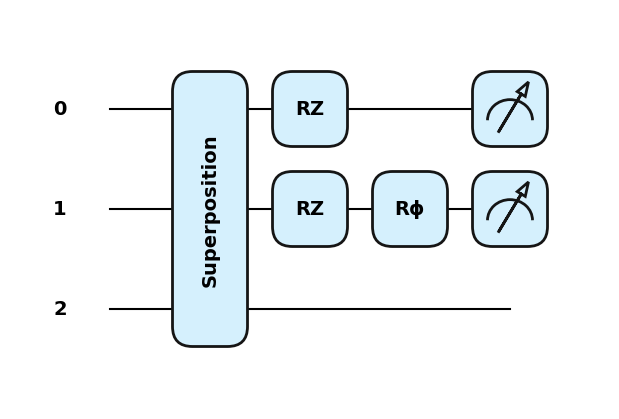

In [185]:
qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(base, coeff, p)
plt.show()

In [ ]:
# calculate rotation angle
dev = qml.device('default.qubit', wires=3)

base = [[0,0], [0,1], [1,0], [1,1]]
coeff = [1,3,2,3] # works only when p1/p2 == p3/p4

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')
    
    return qml.probs([0,1])

p = circuit(base, coeff)
print(f'original amplitudes : {p}')

def rotAngle_phase3(p):
    c1 = (np.log(p[3]) - np.log(p[0])) / 2j
    c2 = (np.log(p[3]) - np.log(p[1])) / 2j
    c3 = (np.log(p[3]) - np.log(p[2])) / 2j
    return [c1, c2, c3]
    
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(base, coeff, p):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    
    # rotation
    p0, p1, p2 = rotAngle_phase3(p)
    
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

print(circuit(base, coeff, p))

qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(base, coeff, p)
plt.show()

In [224]:
# Define phase angles
phi1, phi2, phi3 = np.random.uniform(0, 2*np.pi, 3)

# Create a device
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def phase_shift_circuit():
    """Apply phase shifts to a uniform superposition of 2 qubits."""
    
    # Step 1: Prepare equal superposition state
    for wire in range(2):
        qml.Hadamard(wires=wire)

    # Step 2: Apply selective phase shifts
    qml.PhaseShift(phi1, wires=0)  # Phase shift for |00⟩
    qml.PhaseShift(phi2, wires=1)  # Phase shift for |01⟩
    qml.CRot(phi3, 0, 0, wires=[0, 1])  # Controlled phase rotation for |10⟩

    return qml.state()

# Run circuit and get output state
output_state = phase_shift_circuit()
print("Final state vector:", output_state)

Final state vector: [ 0.5       +0.j          0.36361699-0.34319482j -0.00964724-0.49990692j
 -0.15225012+0.47625613j]


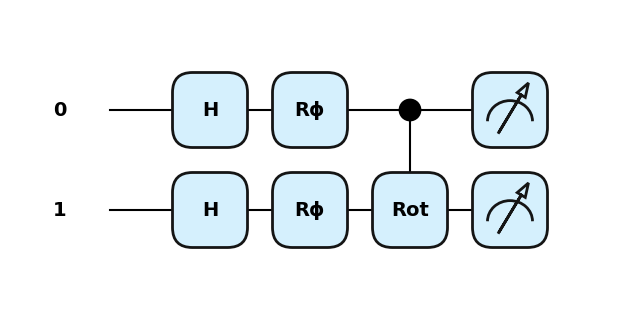

In [225]:
qml.draw_mpl(phase_shift_circuit, style="pennylane", show_all_wires=True)()
plt.show()

In [226]:
import pennylane as qml
import numpy as np

# Define phase angles
phi1, phi2, phi3 = np.random.uniform(0, 2*np.pi, 3)

# Create a device
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def controlled_phase_circuit():
    """Apply controlled phase shifts to basis states."""
    
    # Step 1: Prepare equal superposition state
    for wire in range(2):
        qml.Hadamard(wires=wire)

    # Step 2: Apply controlled-phase operations
    qml.ctrl(qml.PhaseShift(phi1, wires=0), control=1)  # Control on qubit 1 for |00⟩
    qml.ctrl(qml.PhaseShift(phi2, wires=1), control=0)  # Control on qubit 0 for |01⟩
    qml.ctrl(qml.PhaseShift(phi3, wires=0), control=1)  # Control on qubit 1 for |10⟩

    return qml.state()

# Run circuit and get output state
output_state = controlled_phase_circuit()
print("Final state vector:", output_state)

Final state vector: [0.5       +0.j         0.5       +0.j         0.5       +0.j
 0.36300669+0.34384029j]


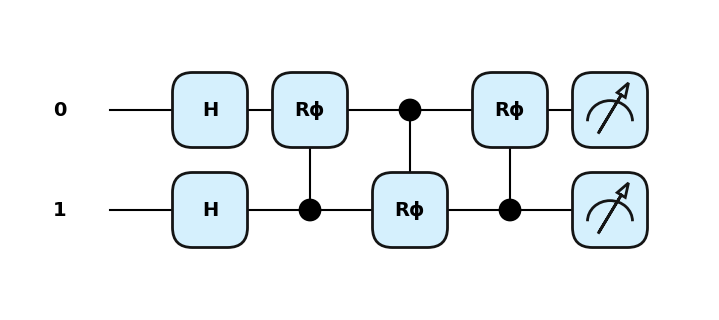

In [227]:
qml.draw_mpl(controlled_phase_circuit, style="pennylane", show_all_wires=True)()
plt.show()

In [228]:
# Define independent phase angles
phi1, phi2, phi3 = np.random.uniform(0, 2*np.pi, 3)  # |11> remains unchanged

# Create a device
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def independent_phase_shift_circuit():
    """Apply fully independent phase shifts to basis states."""
    
    # Step 1: Prepare equal superposition state
    for wire in range(2):
        qml.Hadamard(wires=wire)

    # Step 2: Apply explicit diagonal unitary phase shifts
    qml.MultiRZ(phi1, wires=[0, 1])  # Applies phase shift e^{i\phi_1} to |00⟩
    qml.ctrl(qml.PhaseShift(phi2, wires=1), control=0)  # Applies e^{i\phi_2} to |01⟩
    qml.ctrl(qml.PhaseShift(phi3, wires=0), control=1)  # Applies e^{i\phi_3} to |10⟩

    return qml.state()

# Run circuit and get output state
output_state = independent_phase_shift_circuit()
print("Final state vector:", output_state)

Final state vector: [-0.38509094-0.31891216j -0.38509094+0.31891216j -0.38509094+0.31891216j
  0.3173643 +0.38636758j]


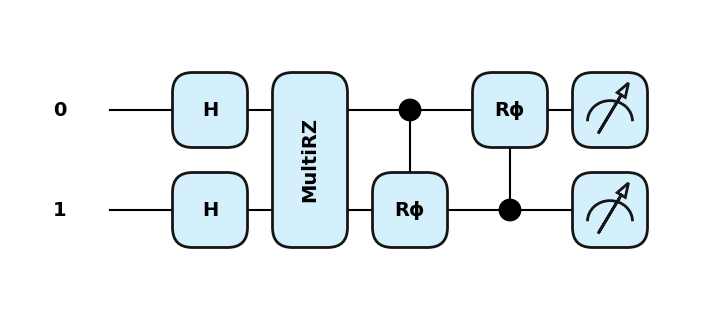

In [229]:
qml.draw_mpl(independent_phase_shift_circuit, style="pennylane", show_all_wires=True)()
plt.show()

In [276]:
# calculate rotation angle
dev = qml.device('default.qubit', wires=3)

base = [[0,0], [0,1], [1,0], [1,1]]
coeff = [1,2,3,2] # works only when p1/p2 == p3/p4

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')
    
    return qml.probs([0,1])

p = circuit(base, coeff)
print(f'original amplitudes : {p}')

norm of the state : 1.0
original amplitudes : [0.05555556 0.22222222 0.5        0.22222222]


In [277]:
def rotAngle_U(p):
    c1 = (np.log(p[3]) - np.log(p[0])) / 2j
    c2 = (np.log(p[3]) - np.log(p[1])) / 2j
    c3 = (np.log(p[3]) - np.log(p[2])) / 2j
    c4 = 1
    return [c1, c2, c2, c4]

# construct an unitary matrix
p_exp = [np.exp(complex(0,i)) for i in rotAngle_U(p)]
U = np.diag(p_exp)
pd.DataFrame(U.reshape(4,4))

,0,1,2,3
0,2.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j
1,0.0+0.0j,1.0+0.0j,0.0+0.0j,0.000000+0.000000j
2,0.0+0.0j,0.0+0.0j,1.0+0.0j,0.000000+0.000000j
3,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.540302+0.841471j


In [278]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')

    # unitary to apply phases
    qml.QubitUnitary(U, wires=[0,1])
    
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

circuit(base, coeff)

norm of the state : 1.0


(array([0.44444444, 0.72222222]),
 array([0.72222222, 0.44444444]),
 array([0.22222222, 0.22222222, 0.5       , 0.22222222]))

In [288]:
# combined
# calculate rotation angle
dev = qml.device('default.qubit', wires=3)

base = [[0,0], [0,1], [1,0], [1,1]]
coeff = [1,1,3,2]

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')
    
    return qml.probs([0,1])

p = circuit(base, coeff)
print(f'original amplitudes : {p}')

def rotAngle_U(p):
    c1 = (np.log(p[3]) - np.log(p[0])) / 2j
    c2 = (np.log(p[3]) - np.log(p[1])) / 2j
    c3 = (np.log(p[3]) - np.log(p[2])) / 2j
    c4 = 1
    return [c1, c2, c3, c4]

# construct an unitary matrix
p_exp = [np.exp(complex(0,i)) for i in rotAngle_U(p)]
U = np.diag(p_exp)
pd.DataFrame(U.reshape(4,4))

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')

    # unitary to apply phases
    qml.QubitUnitary(U, wires=[0,1])
    
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

a,b,c = circuit(base, coeff)
print(a,b,c)
print(np.linalg.norm(c))

norm of the state : 1.0
original amplitudes : [0.06666667 0.06666667 0.6        0.26666667]
norm of the state : 1.0
[0.53333333 0.53333333] [0.53333333 0.53333333] [0.26666667 0.26666667 0.26666667 0.26666667]
0.5333333333333332


In [320]:
# combined
# calculate rotation angle
dev = qml.device('default.qubit', wires=3)

base = [[0,1], [1,0], [1,1]]
coeff = [3,2,3]

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')
    
    return qml.probs([0,1])

p = circuit(base, coeff)
p = p[1:]
print(f'original amplitudes : {p}')

def rotAngle_U(p):
    c1 = (np.log(p[2]) - np.log(p[0])) / 2j
    c2 = (np.log(p[2]) - np.log(p[1])) / 2j
    c3 = 1
    return [c1, c2, c3]

# construct an unitary matrix
p_exp = [1] + [np.exp(complex(0,i)) for i in rotAngle_U(p)]
U = np.diag(p_exp)
print(pd.DataFrame(U.reshape(4,4)))

@qml.qnode(dev)
def circuit(base, coeff):
    # coefficient normalization
    coeff = np.array(coeff).reshape(1, -1)
    coeff = normalize(coeff, norm='l2').flatten()
    qml.Superposition(coeff, base, wires=[0,1], work_wire=2)
    print(f'norm of the state : {np.linalg.norm(coeff)}')

    # unitary to apply phases
    qml.QubitUnitary(U, wires=[0,1])
    
    return qml.probs(0), qml.probs(1), qml.probs([0,1])

a,b,c = circuit(base, coeff)
print(a,b,c)
print(np.linalg.norm(c))

norm of the state : 1.0
original amplitudes : [0.40909091 0.18181818 0.40909091]
          0         1         2                   3
0  1.0+0.0j  0.0+0.0j  0.0+0.0j  0.000000+0.000000j
1  0.0+0.0j  1.0+0.0j  0.0+0.0j  0.000000+0.000000j
2  0.0+0.0j  0.0+0.0j  1.5+0.0j  0.000000+0.000000j
3  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.540302+0.841471j
norm of the state : 1.0
[0.40909091 0.81818182] [0.40909091 0.81818182] [0.         0.40909091 0.40909091 0.40909091]
0.7085662394599949


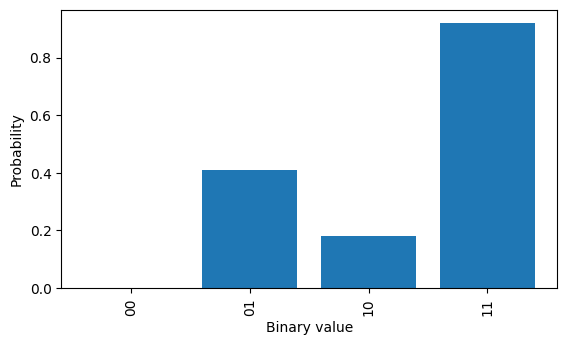

In [319]:
# probability plot
bit_strings = [f"{x:0{2}b}" for x in range(4)]

plt.bar(bit_strings, c)
plt.xlabel("Binary value")
plt.ylabel("Probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

norm of the state : 1.0


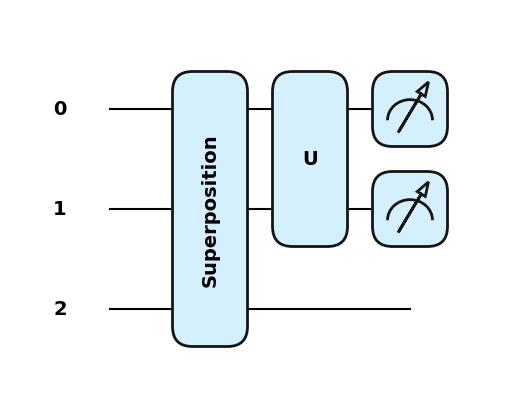

In [305]:
fig, axs = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)(base, coeff)
plt.show()

In [296]:
fig.savefig('applyU.png')

In [2]:
# Define a unitary matrix
U = np.array([[0.94877869, 0.31594146], [-0.31594146, 0.94877869]])

# Apply the controlled unitary operation
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit():
    qml.ControlledQubitUnitary(U, wires=[0, 1, 2])  # Control on wires 0 and 1, target on wire 2
    return qml.state()

print(circuit())

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


Matplotlib is building the font cache; this may take a moment.


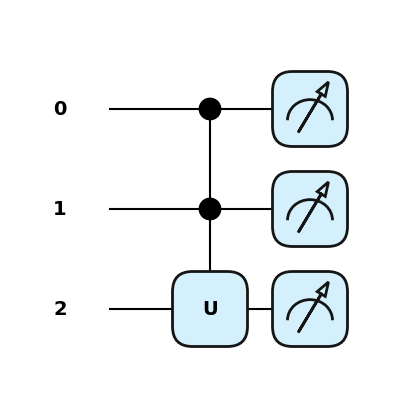

In [3]:
fig, axs = qml.draw_mpl(circuit, style="pennylane", show_all_wires=True)()
plt.show()

In [9]:
dev = qml.device("default.gaussian", wires=2)

@qml.qnode(dev)
def circuit():
    qml.ControlledAddition(s=0.5, wires=[0, 1])
    return qml.expval(qml.X(1))  # Expectation value of Pauli-X on wire 1

print(circuit())

DeviceError: Observable PauliX not supported on device default.gaussian